In [4]:
import numpy as np
import random
from scipy import optimize
from scipy.optimize import minimize

random.seed(1917)
np.random.seed(1917)

import matplotlib.pyplot as plt
%matplotlib inline

# 1

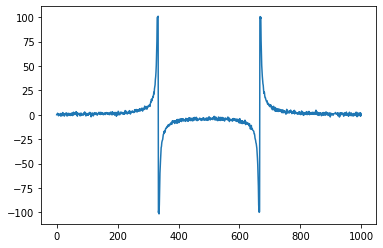

In [5]:
x = np.array([3*i/1000 for i in range(1000)])

def fx(x): return 1/(x**2 -3*x +2)

y = np.array([-100+np.random.standard_normal(1) if fx(x[i])<-100 else 100+np.random.standard_normal(1) if fx(x[i])>100 else fx(x[i])+np.random.standard_normal(1) if -100 <=fx (x[i]) <= 100 else np.inf for i in range(1000)])

#plt.plot(x)
plt.plot(y)

In [10]:
def rational(a, x=x):
    a, b, c, d = a
    return (a * x + b) / (x**2 + c*x + d)

def loss_rational(a, x=x, y=y):
    return sum([(rational(a, x[i]) - y[i])**2 for i in range(1000)])

## Nelder-Mead

In [11]:
x0 = np.array([1, 1, 1, 1])
nelder = minimize(loss_rational, x0, method='nelder-mead', tol=0.001)

In [6]:
nelder

 final_simplex: (array([[-1.00150589,  1.00199228, -2.00087714,  1.00089342],
       [-1.00141973,  1.00190641, -2.00087764,  1.00089391],
       [-1.00146944,  1.00195596, -2.0008768 ,  1.00089307],
       [-1.00139146,  1.00187791, -2.0008769 ,  1.00089317],
       [-1.00137451,  1.00186075, -2.00087689,  1.00089316]]), array([137488.45031007, 137488.45064388, 137488.45070875, 137488.4509535 ,
       137488.45114235]))
           fun: 137488.45031007423
       message: 'Optimization terminated successfully.'
          nfev: 590
           nit: 344
        status: 0
       success: True
             x: array([-1.00150589,  1.00199228, -2.00087714,  1.00089342])

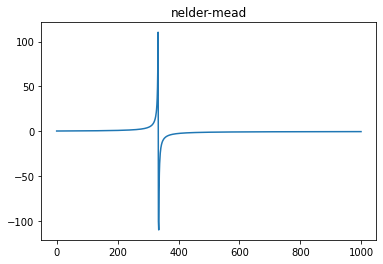

In [20]:
#plt.plot(y, '.')
plt.plot(rational(nelder.x, x))
#
plt.title('nelder-mead')

## LM

In [12]:
def rational_lm(a, x=x, y=y):
    return np.array([(rational(a, x[i]) - y[i])**2 for i in range(1000)]).squeeze()
lm = optimize.least_squares(rational_lm, x0, method='lm', verbose=1)

`xtol` termination condition is satisfied.
Function evaluations 231, initial cost 8.9115e+08, final cost 4.4314e+08, first-order optimality 1.35e+12.


In [15]:
loss_rational(lm.x)

In [9]:
lm.x

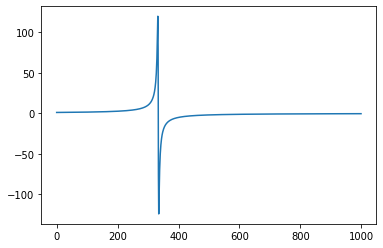

In [21]:
#plt.plot(y, '.')
plt.plot(rational(lm.x))

## Simulated annealing

In [12]:
bounds =np.array([(-2, 2), (-2, 2), (-2, 2), (-2, 2)])
x0 = np.array([1, 1, 1, 1])
sa = optimize.dual_annealing(loss_rational, bounds, seed=1, x0=x0)

In [13]:
sa

     fun: array([137936.09788815])
 message: ['Maximum number of iteration reached']
    nfev: 8891
    nhev: 0
     nit: 1000
    njev: 178
  status: 0
 success: True
       x: array([-1.00168282,  1.00194517, -2.        ,  1.00001629])

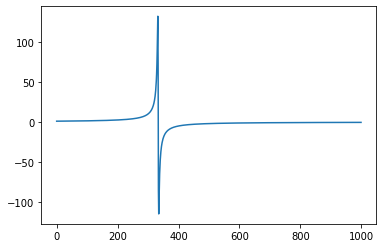

In [22]:
#plt.plot(y, '.')
plt.plot(rational(sa.x))

## Differential evolution

In [24]:
de = optimize.differential_evolution(loss_rational, bounds, x0=x0, tol=0.001)

In [25]:
de

     fun: array([136398.73495891])
     jac: array([  -3635.74365501,   -2149.1956562 , 1745755.25640246,
        608017.71838935])
 message: 'Optimization terminated successfully.'
    nfev: 9530
     nit: 155
 success: True
       x: array([-1.0125136 ,  1.01275104, -2.        ,  1.0000167 ])

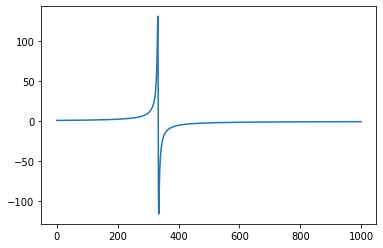

In [26]:
plt.plot(rational(de.x))

## All

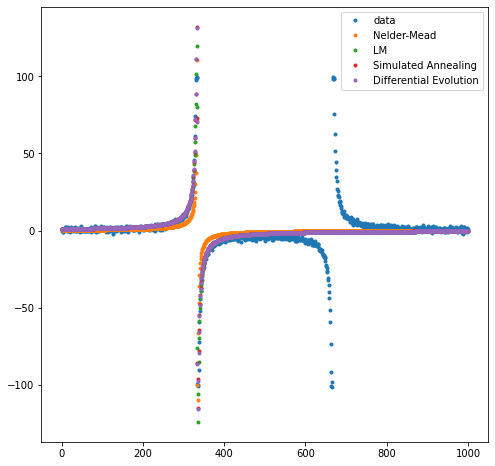

In [33]:
plt.figure(figsize=(8, 8))
plt.plot(y, '.', label='data')
plt.plot(rational(nelder.x), '.', label='Nelder-Mead')
plt.plot(rational(lm.x), '.', label='LM')
plt.plot(rational(sa.x), '.', label='Simulated Annealing')
plt.plot(rational(de.x), '.', label='Differential Evolution')
plt.legend()

# 2

example from frigidum documentation 

In [11]:
!pip install frigidum

     |████████████████████████████████| 1.1 MB 29.9 MB/s            


In [41]:
!wget http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/pcb442.tsp

--2021-11-24 13:49:40--  http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/pcb442.tsp
Resolving elib.zib.de (elib.zib.de)... 130.73.108.67
Connecting to elib.zib.de (elib.zib.de)|130.73.108.67|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12414 (12K) [text/plain]
Saving to: ‘pcb442.tsp’

pcb442.tsp          100%[===================>]  12.12K  --.-KB/s    in 0.07s   

2021-11-24 13:49:41 (186 KB/s) - ‘pcb442.tsp’ saved [12414/12414]



In [48]:
with open('pcb442.tsp', 'r') as dist:
    d= dist.readlines()
    l=[]
    for i in range(6, len(d)-1):
        matr = d[i].split()
        l.append([float(matr[ir]) for ir in range(1,len(matr))])
coordinates = np.array(l)

In [67]:
np.random.shuffle()

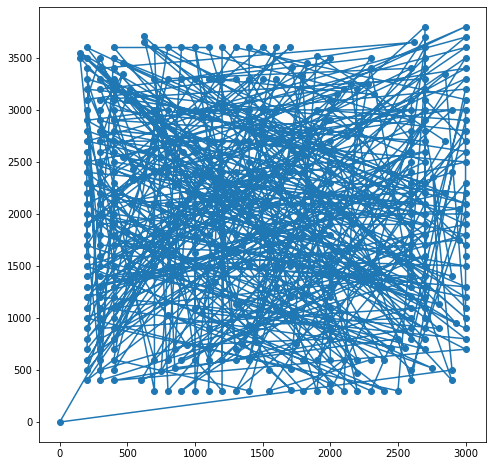

In [72]:
plt.figure(figsize=(8,8))
plt.scatter(coordinates[:,0], coordinates[:,1])

start = list(range(len(coordinates[:,0])))
np.random.shuffle(start)
plt.plot(coordinates[:,0][start], coordinates[:,1][start])

In [55]:
import frigidum 
from frigidum.examples import tsp

local_opt = frigidum.sa(random_start=tsp.random_start,
           objective_function=tsp.objective_function,
           neighbours=[tsp.euclidian_bomb_and_fix, tsp.euclidian_nuke_and_fix, tsp.route_bomb_and_fix, tsp.route_nuke_and_fix, tsp.random_disconnect_vertices_and_fix],
           copy_state=frigidum.annealing.naked,
           T_start=10**5,
           alpha=.92,
           T_stop=0.001,
           repeats=10**2,
           post_annealing = tsp.local_search_2opt)

---
Neighbour Statistics: 
(proportion of proposals which got accepted *and* changed the objective function)
   euclidian_bomb_and_fix           : 0.226879
   euclidian_nuke_and_fix           : 0.253028
   route_bomb_and_fix               : 0.243343
   route_nuke_and_fix               : 0.242479
   random_disconnect_vertices_and_  : 0.137326
---
(Local) Minimum Objective Value Found: 
   51910.13406490


T: 0.001, M: 0.04, O_min: 52283.6797, O_current: 52283.6797: 100%|██████████| 221/221 [06:04<00:00,  1.65s/cooling]


In [59]:
local_opt[1]

51910.13406490378

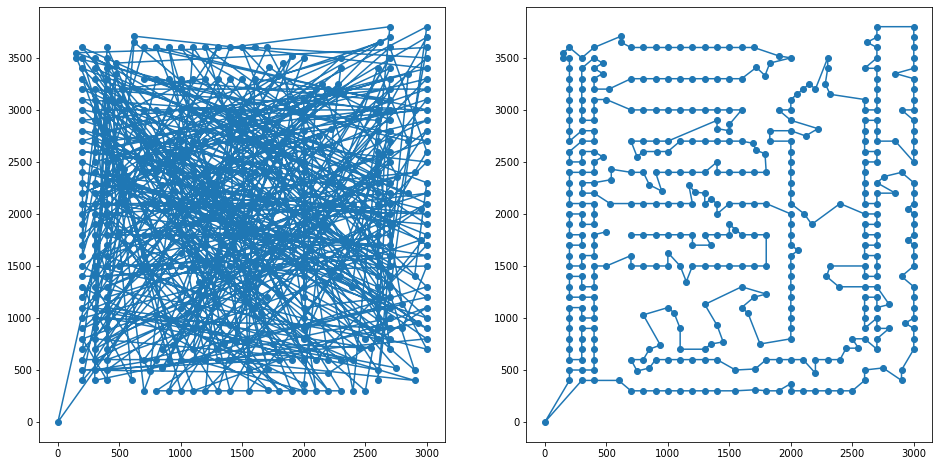

In [73]:
#plt.figure(figsize=(8,8))
ig = plt.figure(figsize=(16,8))
ig.add_subplot(121)
plt.scatter(coordinates[:,0], coordinates[:,1])
start = list(range(len(coordinates[:,0])))
np.random.shuffle(start)
plt.plot(coordinates[:,0][start], coordinates[:,1][start])
ig.add_subplot(122)
plt.scatter(coordinates[:, 0][local_opt[0]], coordinates[:, 1][local_opt[0]])
plt.plot(coordinates[:, 0][local_opt[0]], coordinates[:, 1][local_opt[0]])